to do when merging
- save the file after filling in null values


In [1]:
import pandas as pd

In [3]:
location_df = pd.read_csv('Use this dataset/uswtdb_v5_0_20220427_rename.csv', encoding='latin1')

In [19]:
location_df.isnull().sum()

case_id                                   0
faa_digital_obstacle_id                3298
faa_obstruction_evaluation_id          3807
usgs_id                               28746
eia_id                                    0
state                                     0
county                                    0
state_county_id                           0
project_name                              0
operational_year                          0
project_turbine_num                       0
cumulative_capacity (MW)                  3
manufacturer                           1089
model_name                             1092
turbine_capacity (KW)                   929
hub_height (m)                         1569
rotor_diameter (m)                     1331
rotor_swept area (m2)                  1331
max_height (m)                         1570
retrofit (y/n)                            0
retrofit_year                         59593
attribute_confidence_level (1/2/3)        0
location_confidence_level (1/2/3

# Try to fill in missing values

## operational_year

In [14]:
location_df[location_df.operational_year.isnull()]

,case_id,faa_digital_obstacle_id,faa_obstruction_evaluation_id,usgs_id,eia_id,state,county,state_county_id,project_name,operational_year,...,rotor_swept area (m2),max_height (m),retrofit (y/n),retrofit_year,attribute_confidence_level (1/2/3),location_confidence_level (1/2/3),location_verification_date,image_source,xlong,ylat
25786,3088585,NaN,NaN,NaN,50532.0,CA,Kern County,6029,Historic Victory Garden (Wind Stream),NaN,...,NaN,NaN,0,NaN,1,3,5/8/2018,Digital Globe,-118.375799,35.074235
25830,3088586,NaN,NaN,NaN,50532.0,CA,Kern County,6029,Historic Victory Garden (Wind Stream),NaN,...,NaN,NaN,0,NaN,1,3,5/8/2018,Digital Globe,-118.375610,35.074281


In [17]:
# get project_name Historic Victory Garden (Wind Stream)
location_df[location_df['project_name'] == 'Historic Victory Garden (Wind Stream)'].operational_year.value_counts()

1982.0    213
Name: operational_year, dtype: int64

In [18]:
# fill in year as 1982
location_df.loc[location_df['project_name'] == 'Historic Victory Garden (Wind Stream)', 'operational_year'] = 1982

## explore location confidence

In [27]:
location_df['location_confidence_level (1/2/3)'].value_counts()

3    63534
1     1831
2      212
Name: location_confidence_level (1/2/3), dtype: int64

Majority of the location is valued at a 3 confidence level

## visualize the plants

In [5]:
location_df.head()

,case_id,faa_digital_obstacle_id,faa_obstruction_evaluation_id,usgs_id,eia_id,state,county,state_county_id,project_name,operational_year,...,rotor_swept area (m2),max_height (m),retrofit (y/n),retrofit_year,attribute_confidence_level (1/2/3),location_confidence_level (1/2/3),location_verification_date,image_source,xlong,ylat
0,3072695,NaN,NaN,5143.0,52161.0,CA,Kern County,6029,251 Wind,1987.0,...,NaN,NaN,0,NaN,2,3,5/8/2018,Digital Globe,-118.364410,35.077435
1,3072704,NaN,NaN,5146.0,52161.0,CA,Kern County,6029,251 Wind,1987.0,...,NaN,NaN,0,NaN,2,3,5/8/2018,Digital Globe,-118.364197,35.077644
2,3072661,NaN,NaN,5149.0,52161.0,CA,Kern County,6029,251 Wind,1987.0,...,NaN,NaN,0,NaN,2,3,5/8/2018,Digital Globe,-118.363762,35.077908
3,3046335,25-025116,2013-WTE-5773-OE,26722.0,58661.0,MA,Barnstable County,25001,6th Space Warning Squadron,2013.0,...,5345.62,121.3,0,NaN,3,3,9/1/2019,Digital Globe,-70.545303,41.754192
4,3046262,25-025115,2013-WTE-5497-OE,26723.0,58661.0,MA,Barnstable County,25001,6th Space Warning Squadron,2013.0,...,5345.62,121.3,0,NaN,3,3,9/1/2019,Digital Globe,-70.541801,41.752491


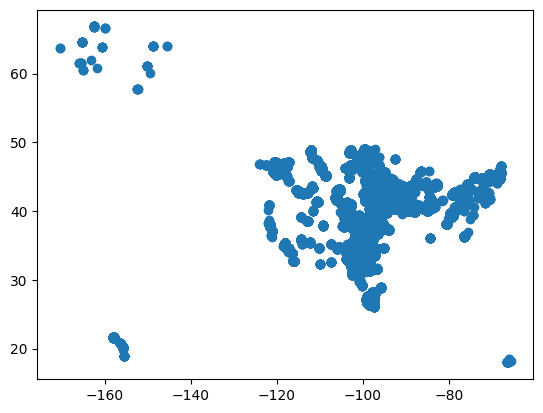

In [7]:
# do a scatter plot of the lat and long
import matplotlib.pyplot as plt
plt.scatter(location_df['xlong'], location_df['ylat'])
plt.show()

In [12]:
# plot the lat and long on a map
import folium
from folium.plugins import HeatMap

# create a map
m = folium.Map(location=[location_df['ylat'].mean(), location_df['xlong'].mean()], zoom_start=4)

# add a heat map
HeatMap(data=location_df[['ylat', 'xlong']].groupby(['ylat', 'xlong']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(m)

# show the map
m